<a href="https://colab.research.google.com/github/ethandlouiee/mgmt467-analytics-portfolio/blob/main/Week5_DataViz_Dashboarding_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MGMT 467 — Week 5: Data Visualization & Dashboarding

Instructor: **Prof. Alok R. Chaturvedi**  
Modality: **Guided Inquiry (Tuesday)** + **Hands-on Lab (Thursday)**  
Prepared: 2025-09-23  

---
### Learning Objectives
1. Distinguish **exploratory** vs **explanatory** visualization.  
2. Match common **chart types** to the **questions** they answer.  
3. Design **airline KPIs** and select appropriate visuals.  
4. Use **Gemini** to generate Matplotlib/Seaborn code in Colab.  
5. Build an **interactive dashboard** in Looker Studio using BigQuery/CSV.


### Q1 — Exploratory vs. Explanatory
**Prompt:** *"Explain the difference between exploratory and explanatory visualization."*

📝 **Your response:**

*   **Exploratory Visualization** is the process of using data visualization to understand your data. It's like having a conversation with your dataset. The primary audience is a data analyst or scientist. The purpose is discovery, finding patterns, identifying outliers, and formulating hypotheses. These visuals are often created quickly, are not highly polished, and are iterated upon many times as the analysis deepens.

*   **Explanatory Visualization** is the process of using data visualization to tell a story or communicate specific findings to an audience. The audience is typically a non-technical stakeholder, like an executive or a client. The purpose is to convey a clear, concise message that has already been discovered during the exploratory phase. These visuals are highly polished, have a clear narrative, remove unnecessary clutter, and are designed to lead the audience to a specific conclusion.

---

### Q2 — Chart Types & When to Use Them
**Prompt:** *"Describe 5 common chart types..."*

📝 **Your response:**

1.  **Bar Chart:**
    *   **Question archetype:** "How does this value compare across different categories?" (e.g., Which airline has the highest on-time rate?)
    *   **Data shape:** One categorical variable and one numerical variable.
    *   **Pitfalls:** Too many categories can make it unreadable; using a non-zero baseline can be misleading.
    *   **Alternatives:** Horizontal bar chart (for long labels), Lollipop chart, Dot plot.

2.  **Line Chart:**
    *   **Question archetype:** "How has this value changed over a continuous period?" (e.g., What is the trend of our average daily delay over the last quarter?)
    *   **Data shape:** A time-series, with a continuous variable (like time) on the x-axis and a numerical variable on the y-axis.
    *   **Pitfalls:** Too many lines can become a "spaghetti plot"; an inappropriate time scale can hide or exaggerate trends.
    *   **Alternatives:** Area chart (to show volume/cumulative value), Sparklines (for a compact trend view).

3.  **Scatter Plot:**
    *   **Question archetype:** "What is the relationship or correlation between two numerical variables?" (e.g., Is there a relationship between flight distance and arrival delay?)
    *   **Data shape:** Two numerical variables.
    *   **Pitfalls:** Overplotting (too many points hiding the true distribution); misinterpreting correlation as causation.
    *   **Alternatives:** Hexbin plot or 2D density plot (for overplotting), adding a trend line, coloring points by a third categorical variable.

4.  **Histogram:**
    *   **Question archetype:** "What is the distribution of a single numerical variable?" (e.g., How are our flight delays distributed? Are they mostly small or are there many large delays?)
    *   **Data shape:** One numerical variable.
    *   **Pitfalls:** The number and width of bins can drastically change the perceived shape of the distribution.
    *   **Alternatives:** Density plot (for a smoother distribution), Box plot (to see summary statistics like median and quartiles).

5.  **Map:**
    *   **Question archetype:** "What is the geographical pattern of our data?" (e.g., Which airports have the highest passenger volume?)
    *   **Data shape:** Geographical data (latitude/longitude, state, country, zip code) and a numerical or categorical variable to encode as color or size.
    *   **Pitfalls:** Choropleth maps can be misleading if geographical areas are not uniform (e.g., large state with small population); bubble maps can have overlapping points.
    *   **Alternatives:** Geocoded scatter plot, Hexagonal binning on a map.

---

### Q3 — Airline Executive Dashboard KPIs
**Prompt:** *"Brainstorm 5 Key Performance Indicators (KPIs) that should be on this dashboard..."*

📝 **Your response:**

1.  **KPI:** On-Time Performance (OTP) %
    *   **Why it matters:** This is a primary measure of operational reliability and customer satisfaction. High OTP is a key competitive advantage.
    *   **Best chart:** A large KPI card showing the overall percentage (e.g., 88%), possibly with a line or area chart below it showing the daily/weekly trend.
    *   **Drill-down fields:** Carrier, Origin, Destination, Route, Month, Day of Week.

2.  **KPI:** Average Arrival Delay (in minutes)
    *   **Why it matters:** Directly impacts customer experience and operational costs (e.g., crew timing, gate availability). It's the inverse of OTP but provides magnitude.
    *   **Best chart:** A line chart showing the daily average delay with a 7-day rolling average to smooth out noise and highlight trends.
    *   **Drill-down fields:** Carrier, Route, Time of Day, Aircraft Type.

3.  **KPI:** Load Factor %
    *   **Why it matters:** Measures asset utilization and efficiency. A high load factor means the airline is effectively filling the seats it flies, which is crucial for profitability.
    *   **Best chart:** A horizontal bar chart showing Load Factor by Route (Top 10/Bottom 10) to identify strong and weak performing routes.
    *   **Drill-down fields:** Route, Carrier, Month, Aircraft Type.

4.  **KPI:** Cancellation Rate %
    *   **Why it matters:** A flight cancellation is a major service failure, leading to high costs (rebooking, compensation) and severe damage to brand reputation.
    *   **Best chart:** A KPI card for the overall rate and a bar chart showing cancellation rate by reason (e.g., Weather, Maintenance, Crew) to identify root causes.
    *   **Drill-down fields:** Origin, Month (for seasonality), Carrier.

5.  **KPI:** Cost per Available Seat Mile (CASM)
    *   **Why it matters:** This is the airline industry's primary unit cost metric. Monitoring and controlling CASM is fundamental to financial health and profitability.
    *   **Best chart:** A scatter plot of Cost vs. Revenue, with points colored by CASM to visually identify profitable vs. unprofitable flights in the context of their unit cost.
    *   **Drill-down fields:** Aircraft Type, Route, Carrier, Month.

---
## Thursday (Practice) — Colab, Gemini, & Looker Studio

You will:
1) Use **Gemini** in Colab to generate visualization code (Matplotlib/Seaborn).  
2) Use a **synthetic airline dataset** (provided below) *or* connect your own BigQuery data.  
3) Build a **Looker Studio** dashboard for your KPIs.

### Option A — Use Gemini Side Panel in Colab
Open the **Gemini** side panel in Colab ("Extensions" or the right sidebar). Ask it to generate Python code given your prompts and the DataFrame you have in memory. Paste/execute the generated code in new cells.

### Option B — Programmatic Gemini (optional)
If you prefer code, you can install the Generative AI SDK and call Gemini with an API key. (We will not store keys in this notebook.)

> **Reminder:** This course emphasizes **AI-assisted coding**—focus on specifying *clear prompts* and then **reviewing and editing** the generated code for correctness, readability, and ethics.


In [ ]:
# (Optional) Environment setup — run if needed
%%capture
!pip install pandas numpy matplotlib seaborn pyarrow db-dtypes google-cloud-bigquery -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
np.random.seed(42)
print('✅ Environment ready')

### Create a Synthetic Airline Dataset (if you don't have one)
Use this dataset to prototype visualizations and dashboards. It contains realistic columns for the KPIs you defined. You can always swap in your BigQuery data later.


In [ ]:
# Generate a synthetic airline dataset
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(467)

dates = pd.date_range(start='2024-01-01', end='2024-06-30', freq='D')
carriers = ['AA', 'DL', 'UA', 'WN', 'AS']
origins = ['ATL','DFW','DEN','ORD','LAX','SEA','SFO','PHX','CLT','MCO']
dests =   ['JFK','LGA','BOS','SFO','LAX','SEA','MIA','IAH','IAD','PHL']

rows = []
for d in dates:
    for carrier in carriers:
        # number of flights per day per carrier
        n = np.random.randint(80, 140)
        for _ in range(n):
            o = np.random.choice(origins)
            de = np.random.choice(dests)
            if o == de:
                continue
            distance = np.random.randint(300, 2800)
            seats = np.random.choice([90,120,150,180,210])
            load_factor = np.clip(np.random.normal(0.82, 0.07), 0.55, 0.98)
            pax = int(seats * load_factor)
            dep_delay = int(np.random.normal(8, 15))
            arr_delay = dep_delay + int(np.random.normal(0, 12))
            dep_delay = max(dep_delay, -5)
            arr_delay = max(arr_delay, -10)
            cancelled = np.random.rand() < 0.025
            diverted = np.random.rand() < 0.005
            revenue = pax * np.random.uniform(120, 420)
            casm = np.random.uniform(0.08, 0.16)  # cost per available seat mile
            cost = casm * seats * distance
            fuel_burn = distance * np.random.uniform(3.0, 4.5)  # gallons per seat-mile proxy
            nps = np.random.normal(35, 15)  # if you want a customer metric proxy
            rows.append({
                'date': d,
                'carrier': carrier,
                'origin': o,
                'dest': de,
                'distance_miles': distance,
                'seats': seats,
                'passengers': pax,
                'dep_delay_min': dep_delay,
                'arr_delay_min': arr_delay,
                'cancelled': int(cancelled),
                'diverted': int(diverted),
                'revenue_usd': round(revenue, 2),
                'cost_usd': round(cost, 2),
                'fuel_burn_gal': round(fuel_burn, 1),
                'nps': round(nps, 1)
            })

df_flights = pd.DataFrame(rows)

# Derived KPIs
df_flights['on_time'] = (df_flights['arr_delay_min'] <= 15).astype(int)
df_flights['load_factor'] = (df_flights['passengers'] / df_flights['seats']).round(3)
df_flights['yield_usd_per_pax_mile'] = (df_flights['revenue_usd'] / (df_flights['passengers'] * df_flights['distance_miles']).clip(lower=1)).round(4)
df_flights['asm'] = df_flights['seats'] * df_flights['distance_miles']  # available seat miles
df_flights['casm'] = (df_flights['cost_usd'] / df_flights['asm']).round(4)
df_flights['month'] = df_flights['date'].dt.to_period('M').astype(str)

df_flights.head()

,date,carrier,origin,dest,distance_miles,seats,passengers,dep_delay_min,arr_delay_min,cancelled,...,revenue_usd,cost_usd,fuel_burn_gal,nps,on_time,load_factor,yield_usd_per_pax_mile,asm,casm,month
0,2024-01-01,AA,LAX,IAH,444,180,160,-5,-10,0,...,26076.49,8301.98,1904.6,53.4,1,0.889,0.3671,79920,0.1039,2024-01
1,2024-01-01,AA,SEA,PHL,601,150,141,10,7,0,...,17561.91,8739.75,2237.5,60.9,1,0.940,0.2072,90150,0.0969,2024-01
2,2024-01-01,AA,LAX,IAD,749,120,100,13,22,0,...,15355.61,12241.65,3076.5,54.1,0,0.833,0.2050,89880,0.1362,2024-01
3,2024-01-01,AA,DFW,BOS,2153,210,169,13,14,0,...,42122.37,65961.23,6642.2,37.0,1,0.805,0.1158,452130,0.1459,2024-01
4,2024-01-01,AA,CLT,SEA,558,90,75,9,-5,0,...,26418.88,7144.23,2142.3,56.3,1,0.833,0.6313,50220,0.1423,2024-01


### Use Gemini to Generate Visualization Code
Copy/paste these **prompts** into Gemini (Colab side panel). After it generates code, paste it into a new cell and run. **Inspect and fix** anything that looks off.

#### Prompt A — On-Time Rate by Carrier (Bar Chart)
```
You are a Python data viz expert. Given a pandas DataFrame `df_flights` with columns including `carrier` and `on_time` (1/0), write Matplotlib/Seaborn code to compute and plot **On-Time Rate by carrier** as a sorted bar chart with percentage labels on bars. Use a clean style, readable labels, and tight layout. Do not use Plotly.
```

#### Prompt B — Average Arrival Delay over Time (Line Chart)
```
Given `df_flights` with `date` (datetime) and `arr_delay_min`, write code to aggregate to daily average arrival delay and plot a **line chart** with a 7-day rolling average overlay. Add axis labels, title, and grid.
```

#### Prompt C — Delay Distribution (Histogram)
```
Given `df_flights` with `arr_delay_min`, write code to plot a **histogram** of arrival delays with appropriate bins, a vertical reference line at 0, and annotate percent of flights within [-5, 15] minutes.
```

#### Prompt D — Load Factor by Route (Top 15) (Horizontal Bar)
```
Given `df_flights` with `origin`, `dest`, and `load_factor`, compute mean load factor by route (origin-dest pair), take the top 15 routes by average load factor, and plot a **horizontal bar chart**. Ensure long labels are readable.
```

#### Prompt E — Cost vs. Revenue with CASM Coloring (Scatter)
```
Given `df_flights` with `cost_usd`, `revenue_usd`, and `casm`, produce a **scatter plot** of cost vs. revenue with points colored by `casm` (continuous colormap) and add a diagonal y=x reference line. Include labels and legend.
```


/tmp/ipython-input-3838854783.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=on_time_rate.index, y=on_time_rate.values, palette='viridis')


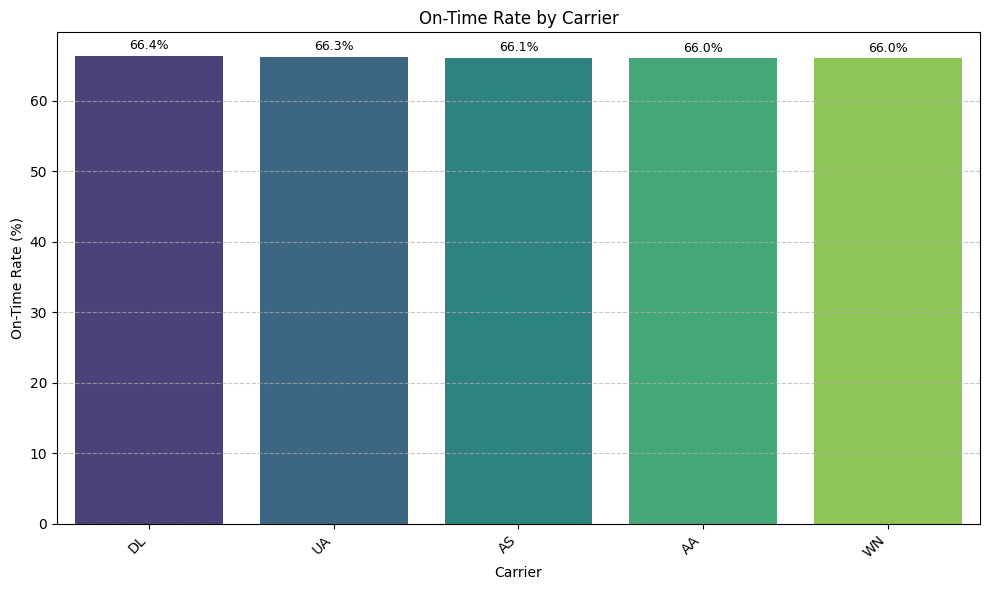

In [ ]:
# prompt: You are a Python data viz expert. Given a pandas DataFrame `df_flights` with columns including `carrier` and `on_time` (1/0), write Matplotlib/Seaborn code to compute and plot **On-Time Rate by carrier** as a sorted bar chart with percentage labels on bars. Use a clean style, readable labels, and tight layout. Do not use Plotly.

import matplotlib.pyplot as plt
on_time_rate = df_flights.groupby('carrier')['on_time'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=on_time_rate.index, y=on_time_rate.values, palette='viridis')
plt.title('On-Time Rate by Carrier')
plt.xlabel('Carrier')
plt.ylabel('On-Time Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{bar.get_height():.1f}%',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


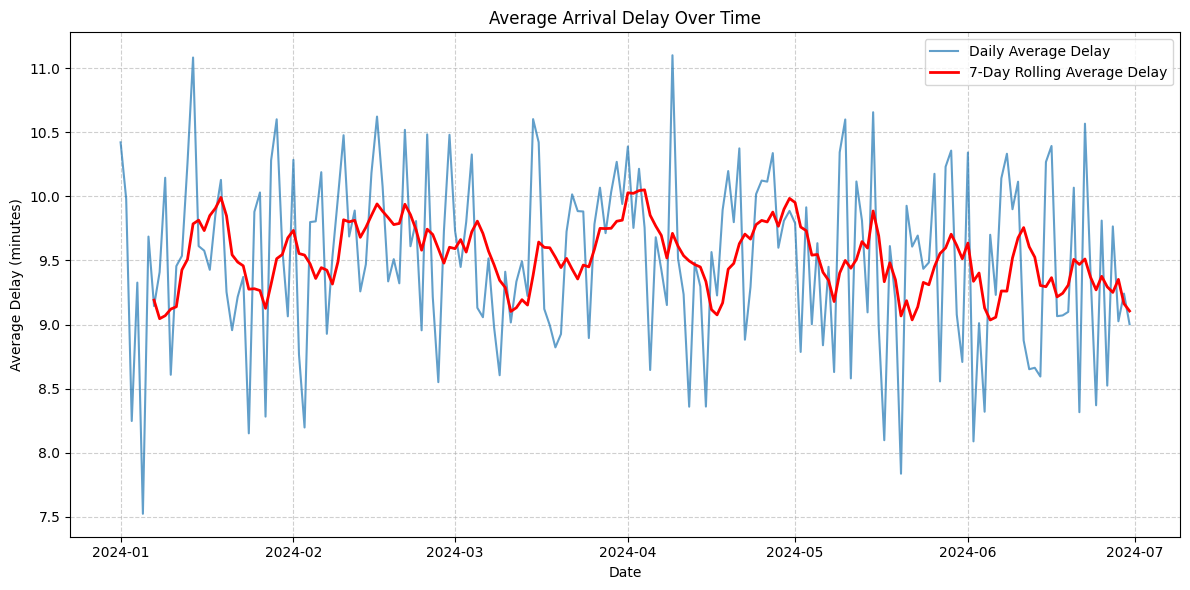

In [ ]:
# prompt: Given `df_flights` with `date` (datetime) and `arr_delay_min`, write code to aggregate to daily average arrival delay and plot a **line chart** with a 7-day rolling average overlay. Add axis labels, title, and grid.

import matplotlib.pyplot as plt
daily_avg_delay = df_flights.groupby('date')['arr_delay_min'].mean()
rolling_avg_delay = daily_avg_delay.rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_avg_delay.index, daily_avg_delay.values, label='Daily Average Delay', alpha=0.7)
plt.plot(rolling_avg_delay.index, rolling_avg_delay.values, label='7-Day Rolling Average Delay', color='red', linewidth=2)

plt.title('Average Arrival Delay Over Time')
plt.xlabel('Date')
plt.ylabel('Average Delay (minutes)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


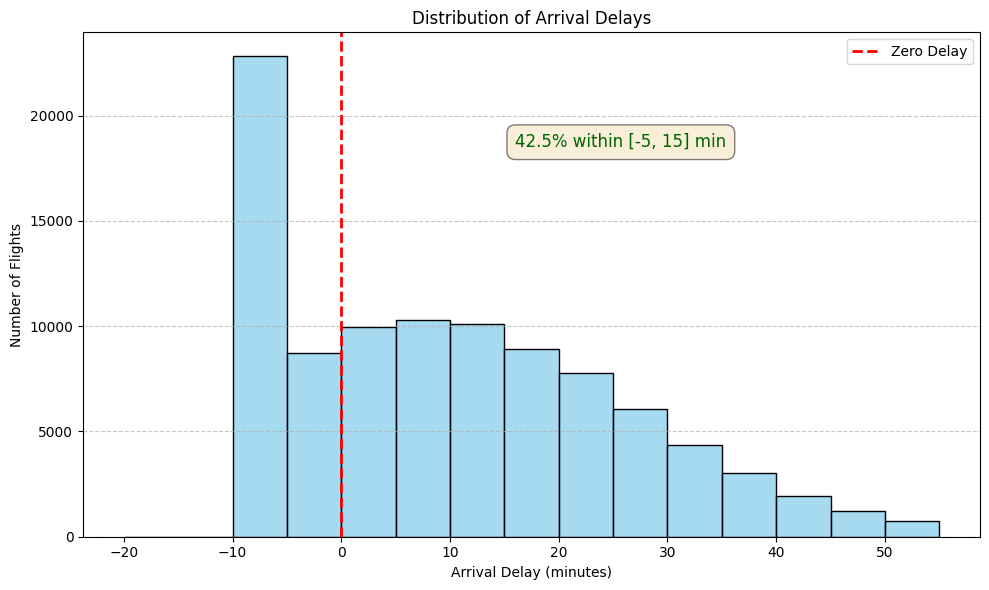

In [ ]:
# prompt: Given `df_flights` with `arr_delay_min`, write code to plot a **histogram** of arrival delays with appropriate bins, a vertical reference line at 0, and annotate percent of flights within [-5, 15] minutes.

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
# Define bins to capture the range of delays, including the [-5, 15] range
bins = np.arange(-20, 60, 5) # Example bins, adjust as needed

sns.histplot(df_flights['arr_delay_min'], bins=bins, kde=False, color='skyblue', edgecolor='black')

plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Delay')

# Calculate and annotate the percentage of flights within [-5, 15] minutes
on_time_range = df_flights[(df_flights['arr_delay_min'] >= -5) & (df_flights['arr_delay_min'] <= 15)]
percentage_on_time = (len(on_time_range) / len(df_flights)) * 100

plt.text(16, plt.ylim()[1] * 0.8, f'{percentage_on_time:.1f}% within [-5, 15] min',
         ha='left', va='top', color='darkgreen', fontsize=12, bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Number of Flights')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-124698817.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=top_15_routes.values, y=route_labels, palette='magma')


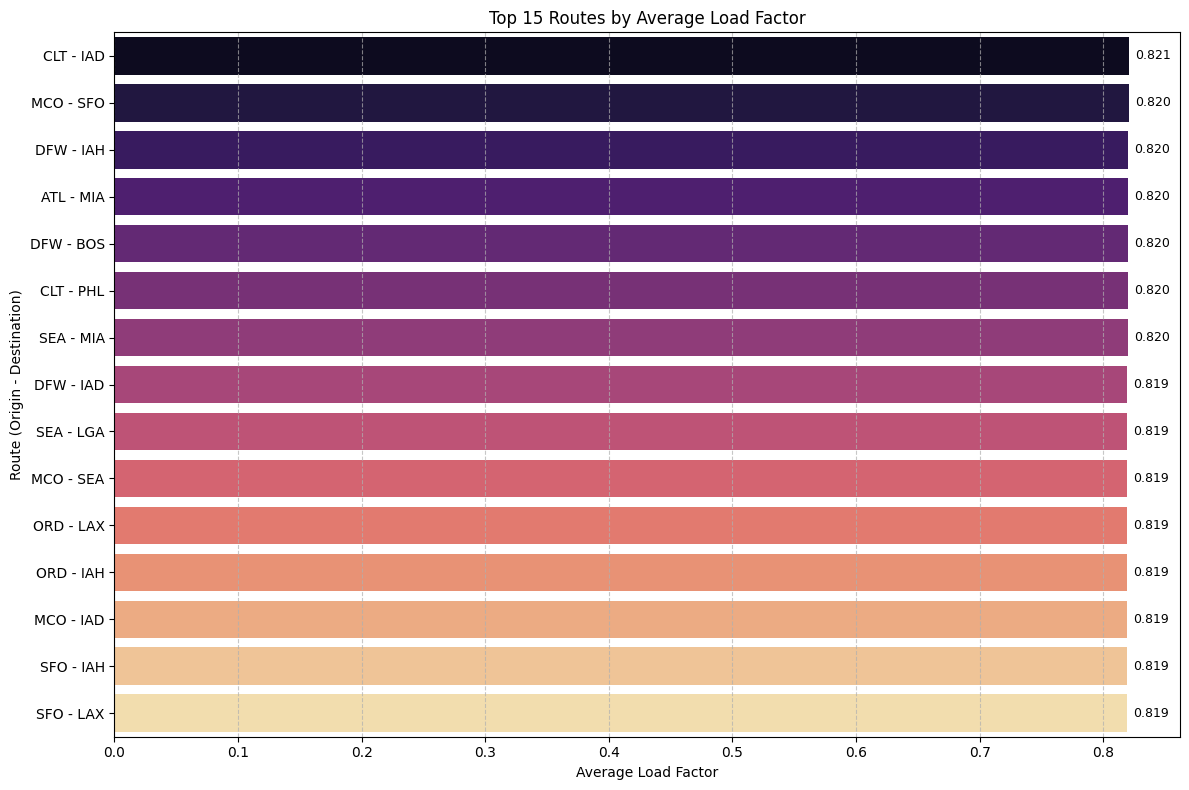

In [ ]:
# prompt: Given `df_flights` with `origin`, `dest`, and `load_factor`, compute mean load factor by route (origin-dest pair), take the top 15 routes by average load factor, and plot a **horizontal bar chart**. Ensure long labels are readable.

import matplotlib.pyplot as plt
import pandas as pd

# Calculate average load factor by route
route_load_factor = df_flights.groupby(['origin', 'dest'])['load_factor'].mean()

# Sort by load factor and take top 15
top_15_routes = route_load_factor.sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 8))
# Create route labels for the y-axis
route_labels = [f"{origin} - {dest}" for origin, dest in top_15_routes.index]

bars = sns.barplot(x=top_15_routes.values, y=route_labels, palette='magma')
plt.title('Top 15 Routes by Average Load Factor')
plt.xlabel('Average Load Factor')
plt.ylabel('Route (Origin - Destination)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels on bars
for bar in bars.patches:
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.3f}',
             ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()


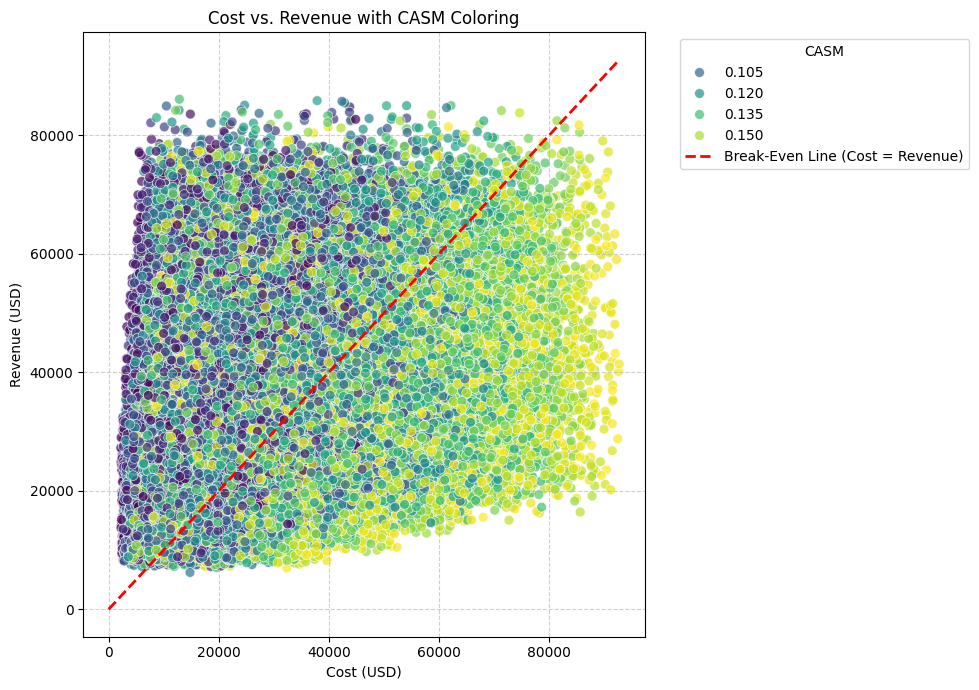

In [ ]:
# prompt: Given `df_flights` with `cost_usd`, `revenue_usd`, and `casm`, produce a **scatter plot** of cost vs. revenue with points colored by `casm` (continuous colormap) and add a diagonal y=x reference line. Include labels and legend.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(data=df_flights, x='cost_usd', y='revenue_usd', hue='casm', palette='viridis', s=50, alpha=0.7)

# Add a diagonal y=x reference line
max_val = max(df_flights['cost_usd'].max(), df_flights['revenue_usd'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', linewidth=2, label='Break-Even Line (Cost = Revenue)')

plt.title('Cost vs. Revenue with CASM Coloring')
plt.xlabel('Cost (USD)')
plt.ylabel('Revenue (USD)')
plt.grid(True, linestyle='--', alpha=0.6)

# Customize the legend for CASM
handles, labels = scatter.get_legend_handles_labels()
# The first handle/label is for the break-even line, the rest are for CASM colors
plt.legend(handles[1:], labels[1:], title='CASM', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### (Optional) Bring Your Own BigQuery Data
If you have airline or operations data in BigQuery, you may connect from Colab. Otherwise, skip to the **Export & Looker Studio** section.

**Auth & Client Setup (run in Colab):**
```python
from google.colab import auth
auth.authenticate_user()
print('✅ Authenticated')

from google.cloud import bigquery
client = bigquery.Client(project='YOUR_PROJECT_ID')
```

**Example Query Skeleton:**
```sql
SELECT date, carrier, origin, dest, distance_miles, seats, passengers,
       dep_delay_min, arr_delay_min, cancelled, diverted, revenue_usd, cost_usd
FROM `your_dataset.your_table`
WHERE date BETWEEN '2024-01-01' AND '2024-06-30'
```

Load to pandas:
```python
query = """
-- paste your SQL here
"""
df_bq = client.query(query).to_dataframe()
df_bq.head()
```

Unify columns with the synthetic schema if you want to reuse prompts/plots:
```python
# Example: ensure `on_time`, `load_factor`, and `casm` exist if needed
df_bq['on_time'] = (df_bq['arr_delay_min'] <= 15).astype(int)
df_bq['load_factor'] = (df_bq['passengers'] / df_bq['seats']).round(3)
df_bq['asm'] = df_bq['seats'] * df_bq['distance_miles']
df_bq['casm'] = (df_bq['cost_usd'] / df_bq['asm']).round(4)
```


### Export for Looker Studio
You can **export to CSV** and upload to Looker Studio, or you can **publish to BigQuery** and connect Looker Studio to that table.

#### Option 1 — Export CSV
Run one of the cells below to save a CSV in Colab, then download it or save to Drive.


In [ ]:
# Save synthetic dataset to CSV
df_flights.to_csv('airline_kpis_synthetic.csv', index=False)
print('📁 Saved: airline_kpis_synthetic.csv (download from the file browser on the left)')

📁 Saved: airline_kpis_synthetic.csv (download from the file browser on the left)


#### Option 2 — Write to BigQuery (optional)
If you prefer Looker Studio → BigQuery:

```python
from google.cloud import bigquery
from google.oauth2 import service_account  # or use Colab auth

client = bigquery.Client(project='YOUR_PROJECT_ID')
table_id = 'YOUR_PROJECT_ID.YOUR_DATASET.airline_kpis_synthetic'
job = client.load_table_from_dataframe(df_flights, table_id)
job.result()
print('✅ Loaded to BigQuery:', table_id)
```

**In Looker Studio:**
1. Create → Report → Add data → **BigQuery**.  
2. Select your project/dataset/table.  
3. Add charts for each KPI and configure filters (carrier, route, month).


In [ ]:
from google.cloud import bigquery
from google.cloud.exceptions import Conflict

# Construct a BigQuery client object.
client = bigquery.Client(project='noble-broker-471012-q6')

# Set dataset_id to the ID of the dataset to create.
dataset_id = "noble-broker-471012-q6.airline_analysis" # You can change 'airline_analysis'

# Construct a full Dataset object to send to the API.
dataset = bigquery.Dataset(dataset_id)

# TODO(developer): Specify the geographic location where the dataset should reside.
dataset.location = "US"

try:
    # Make an API request to create the dataset.
    dataset = client.create_dataset(dataset, timeout=30)
    print(f"Created dataset {client.project}.{dataset.dataset_id}")
except Conflict:
    print(f"Dataset {dataset_id} already exists.")

Created dataset noble-broker-471012-q6.airline_analysis


In [ ]:
from google.cloud import bigquery
from google.oauth2 import service_account  # or use Colab auth

client = bigquery.Client(project='noble-broker-471012-q6')
table_id = 'noble-broker-471012-q6.airline_analysis.airline_kpis_synthetic'
job = client.load_table_from_dataframe(df_flights, table_id)
job.result()
print('✅ Loaded to BigQuery:', table_id)

✅ Loaded to BigQuery: noble-broker-471012-q6.airline_analysis.airline_kpis_synthetic


### Dashboard Wireframe (Design First)
Sketch your intended layout before building it in Looker Studio.

** ME: I like this format, so I'm going to try and replicate it in Looker **
```
+-----------------------------------------------------------+
| Filters: Carrier [AA/DL/UA/WN/AS] | Month [Jan–Jun]       |
+-----------------------------------------------------------+
| KPI Cards: On-Time % | Avg Delay | Cancel % | Load Factor |
+-------------------------------+---------------------------+
| Line: Avg Delay over Time     | Bar: On-Time % by Carrier |
+-------------------------------+---------------------------+
| H-Bar: Top Routes by LF       | Scatter: Cost vs Revenue  |
+-----------------------------------------------------------+
```


## Reflection & Submission

**Short Reflection (3–5 sentences):** What design decision most improved your dashboard’s clarity? What would you change next?

📝 **Your response:**
- Keeping the visuals to a minimum made it less crowded and got the main ideas across more smoothly. It was also nice to have previous dashboard experience to help me go through this learning process.
- Furthermore, keeping everything in a pattern (same colors, etc.) made it much more clean as well.

---
### Checklist
- [ ] Q1–Q3 answered in Tuesday section  
- [ ] 3–5 visualizations generated with **Gemini** in Colab  
- [ ] Synthetic or BigQuery data connected to **Looker Studio**  
- [ ] Dashboard with **filters** and **KPI cards**  
- [ ] Reflection complete  


### Guide: Recreating Python Visuals in Looker Studio

Here are the steps to build each of the five visualizations from your notebook in Looker Studio. For each chart, you'll use the **Add a chart** menu.

---

#### 1. On-Time Rate by Carrier (Bar Chart)

1.  **Add a chart** > **Bar chart** (a vertical one).
2.  In the **Data** panel on the right:
    *   Set **Dimension** to `carrier`.
    *   Set **Metric** to `on_time`.
    *   Click the `SUM` pencil icon next to the `on_time` metric and change its **Aggregation** to **Average**. This will calculate the rate.
3.  In the **Style** panel:
    *   Check the box for **Show data labels** to display the percentages on the bars.
4.  To sort the bars, go back to the **Data** panel, scroll down to the **Sort** section, and sort by the `on_time` metric in **Descending** order.

---

#### 2. Average Arrival Delay over Time (Line Chart)

1.  **Add a chart** > **Time series chart**.
2.  In the **Data** panel:
    *   Set **Dimension** to `date`.
    *   Set **Metric** to `arr_delay_min`.
    *   Change the metric's aggregation from `SUM` to **Average**.
3.  To add the rolling average:
    *   Under the `arr_delay_min` metric, click **Add calculation** > **Running average**.
    *   Set the **Running window size** to `7`.

---

#### 3. Delay Distribution (Histogram)

1.  **Add a chart** > **Bar chart**.
2.  In the **Data** panel:
    *   Set **Dimension** to `arr_delay_min`.
    *   Looker Studio will automatically group the continuous numbers into bins, creating a histogram effect.
    *   You can adjust the bin size in the **Style** panel by changing the **Number of bars**.
3.  In the **Style** panel:
    *   Go to **Reference Lines** > **Add a reference line**.
    *   Set **Type** to **Constant Value**, **Value** to `0`, and give it a label like `On-Time`.

---

#### 4. Load Factor by Route (Top 15) (Horizontal Bar)
This requires creating a new field for the route.

1.  **Add a chart** > **Bar chart** (a horizontal one).
2.  In the **Data** panel, click **Add a field** under your data source.
    *   Give the new field a name, like `Route`.
    *   In the **Formula** box, enter `CONCAT(origin, " - ", dest)` and save.
3.  Configure the chart:
    *   Set **Dimension** to your new `Route` field.
    *   Set **Metric** to `load_factor` and change its aggregation to **Average**.
    *   In the **Sort** section, sort by the `load_factor` metric in **Descending** order.
    *   In the **Rows** section, set the number of rows to **15** to show only the top 15.

---

#### 5. Cost vs. Revenue with CASM Coloring (Scatter Plot)

1.  **Add a chart** > **Scatter chart**.
2.  In the **Data** panel:
    *   Set **Metric X** to `cost_usd` (use Average aggregation if your data has duplicates per point).
    *   Set **Metric Y** to `revenue_usd` (use Average aggregation).
    *   Set the **Bubble Color** dimension to `casm`.
3.  In the **Style** panel:
    *   Look for a **Trendline** option. Add a **Linear** trendline. While not a perfect y=x line, it helps show the relationship. For a true y=x line, you might need to blend data with a pre-calculated line, which is more advanced.

### Guide: Creating Filters and KPI Cards in Looker Studio

Here’s how to set up the interactive controls and summary metrics from your wireframe.

---

### Creating Filters

Filters are added using the **Add a control** menu.

**1. Carrier Filter**
1.  From the top menu, select **Add a control** > **Drop-down list**.
2.  Place the new control box on your report canvas.
3.  In the **Data** panel on the right, set the **Control field** to `carrier`.

**2. Month/Date Filter**
1.  Select **Add a control** > **Date range control**.
2.  Place it on the canvas.
3.  In the **Data** panel, ensure the **Date dimension** is set to `date`.
    *   *This gives the user a flexible calendar to pick start and end dates. They can easily select one or more months from here.*

---

### Creating KPI Cards

KPI cards are created using the **Scorecard** chart type.

**For each of the KPIs below, follow this general process:**
1.  From the top menu, select **Add a chart** > **Scorecard**.
2.  Place it on the canvas.
3.  In the **Data** panel on the right, configure the **Metric** as described for each card.

**1. On-Time % Card**
*   **Metric**: `on_time`
*   **Aggregation**: Click the pencil icon next to the metric and change the aggregation to **Average**.
*   **Formatting**: Go to the **Style** panel, find the **Primary Metric** section, and change the **Number format** to **Percent**.

**2. Average Delay Card**
*   **Metric**: `arr_delay_min`
*   **Aggregation**: Change to **Average**.
*   **Formatting**: In the **Style** panel, you can add a label like "min" to the metric name for clarity.

**3. Cancellation % Card**
*   **Metric**: `cancelled`
*   **Aggregation**: Change to **Average**.
*   **Formatting**: In the **Style** panel, change the **Number format** to **Percent**.

**4. Load Factor Card**
*   **Metric**: `load_factor`
*   **Aggregation**: Change to **Average**.
*   **Formatting**: In the **Style** panel, change the **Number format** to **Percent**.